**Text Classification by Mahmudin Rizal (Mahmudinrizal11@gmail.com)**

Dalam kasus ini akan diidentifikasi pengelompokan text berdasarkan blockchain domain. Dataset yang digunakan disediakan berasal dari kaggle (https://www.kaggle.com/chiru12/classification-of-class-on-basis-of-text). Data hanya diambil 3 kategori dan di pilih text yg panjangnya lebih dari 3 kata.

**Data Preparation**

In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import tensorflow as tf



In [138]:
df = pd.read_csv('root2ai - Data.csv')
df

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain
...,...,...
22699,fourth study discusses blockchain technology e...,Reg Tech
22700,book finishes stating biggest issue emerging F...,Reg Tech
22701,people culture cess,Reg Tech
22702,author challenges execu tive lead change stop ...,Reg Tech


In [105]:
df.Target.value_counts()

FinTech             8551
Cyber Security      2640
Bigdata             2267
Reg Tech            2206
credit reporting    1748
Blockchain          1375
Neobanks            1069
Microservices        977
Stock Trading        787
Robo Advising        737
Data Security        347
Name: Target, dtype: int64

In [106]:
df.Target.isnull().sum()

0

In [107]:
df.Text.isnull().sum()

3

In [139]:
df = df.dropna()

In [140]:
df.isnull().sum()

Text      0
Target    0
dtype: int64

In [141]:
df.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [142]:
df

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain
...,...,...
22699,fourth study discusses blockchain technology e...,Reg Tech
22700,book finishes stating biggest issue emerging F...,Reg Tech
22701,people culture cess,Reg Tech
22702,author challenges execu tive lead change stop ...,Reg Tech


In [143]:
pilihan = ['Cyber Security','Bigdata','Reg Tech']

In [144]:
df = df[df['Target'].isin(pilihan)]

In [145]:
df.Target.value_counts()

Cyber Security    2472
Bigdata           1792
Reg Tech          1734
Name: Target, dtype: int64

In [146]:
df = df.sample(frac=1).reset_index(drop=True)

In [147]:
df['Text'] = df['Text'].str.replace('[^\w\s]','')

In [148]:
df = df[df['Text'].apply(lambda x: len(x.split(' ')) > 3)]

In [149]:
df

,Text,Target
0,state apply national fair unfair deceptive deb...,Cyber Security
1,moreover palpable limitation capacity test sca...,Cyber Security
2,mandatory nature represent guidance based deve...,Cyber Security
3,These central focus context appropriate regula...,Reg Tech
4,given infancy growing rapid pace government co...,Cyber Security
...,...,...
5992,Kate Report Global RegTech Billion Opportunity...,Reg Tech
5993,conclusion nature application attack reconnais...,Cyber Security
5995,towards security digital scope ecosystem decis...,Cyber Security
5996,argue transformative nature technology capture...,Reg Tech


**Mengubah label kategori menjadi one hot encoding dengan dummy variabel**

In [150]:
category = pd.get_dummies(df.Target)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns=['Target'])
df_baru.head()

,Text,Bigdata,Cyber Security,Reg Tech
0,state apply national fair unfair deceptive deb...,0,1,0
1,moreover palpable limitation capacity test sca...,0,1,0
2,mandatory nature represent guidance based deve...,0,1,0
3,These central focus context appropriate regula...,0,0,1
4,given infancy growing rapid pace government co...,0,1,0


In [151]:
df_baru.Text = df_baru.Text.str.lower()

In [153]:
text = df_baru['Text'].values
label = df_baru[['Cyber Security',
                 'Bigdata',
                 'Reg Tech']].values

In [154]:
text

array(['state apply national fair unfair deceptive debt collection also apply',
       'moreover palpable limitation capacity test scale security testing laboratory',
       'mandatory nature represent guidance based develop operational',
       ...,
       'towards security digital scope ecosystem decision must evaluate threat incident matrix',
       'argue transformative nature technology captured approach nexus data digital identity regulation',
       'data analytics healthcare promise potential'], dtype=object)

In [155]:
label

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

**Membagi data untuk training dan data untuk testing**

In [156]:
from sklearn.model_selection import train_test_split
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2, random_state=42, shuffle=True)

**Tokenisasi**

In [157]:
tokenizer = Tokenizer(num_words=4000, oov_token='-')
tokenizer.fit_on_texts(text_train) 
tokenizer.fit_on_texts(text_test)
 
sequen_train = tokenizer.texts_to_sequences(text_train)
sequen_test = tokenizer.texts_to_sequences(text_test)
 
padded_train = pad_sequences(sequen_train) 
padded_test = pad_sequences(sequen_test)

In [158]:
print(tokenizer.word_index)

{'-': 1, 'data': 2, 'financial': 3, 'security': 4, 'digital': 5, 'regulatory': 6, 'technology': 7, 'information': 8, 'risk': 9, 'fintech': 10, 'market': 11, 'regtech': 12, 'also': 13, 'banking': 14, 'sector': 15, 'industry': 16, 'bank': 17, 'payment': 18, 'compliance': 19, 'based': 20, 'business': 21, 'management': 22, 'system': 23, 'regulators': 24, 'services': 25, 'innovation': 26, 'this': 27, 'mobile': 28, 'time': 29, 'development': 30, 'customer': 31, 'international': 32, 'need': 33, 'framework': 34, 'institutions': 35, 'global': 36, 'regulation': 37, 'sandbox': 38, 'access': 39, 'analysis': 40, 'service': 41, 'protection': 42, 'companies': 43, 'potential': 44, 'national': 45, 'systems': 46, 'government': 47, 'finance': 48, 'large': 49, 'must': 50, 'process': 51, 'used': 52, 'markets': 53, 'could': 54, 'provide': 55, 'infrastructure': 56, 'well': 57, 'banks': 58, 'requirements': 59, 'across': 60, 'approach': 61, 'analytics': 62, 'major': 63, 'critical': 64, 'however': 65, 'within':

In [159]:
padded_train

array([[   0,    0,    0, ...,  978,    8,    7],
       [   0,    0,    0, ...,    6,   26,   26],
       [   0,    0,    0, ...,   12,   63,  305],
       ...,
       [   0,    0,    0, ...,  487,  147,  185],
       [   0,    0,    0, ...,  109,  388,    6],
       [   0,    0,    0, ...,  805,  247, 1484]], dtype=int32)

**Modeling dengan beberapa layer dengan juga menggunaka LSTM dan Dropout serta callback agar efisien** 

In [160]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=40000, output_dim=16),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [161]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [162]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          640000    
_________________________________________________________________
dropout (Dropout)            (None, None, 16)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                6272      
_________________________________________________________________
dense (Dense)                (None, 3)                 99        
Total params: 646,371
Trainable params: 646,371
Non-trainable params: 0
_________________________________________________________________


In [32]:
# callbacks for early stop when reach our target accuracy
accuracy_threshold = 93e-2
class our_callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') >= accuracy_threshold and logs.get('val_accuracy')>0.9:
            print('\nFor Epoch', epoch, '\nAccuracy has reach = %2.2f%%' %(logs['accuracy']*100), 
                  '\nVal Accuracy has reach = %2.2f%%' %(logs['val_accuracy']*100), '.training has been stopped. Continue to predict')
            self.model.stop_training = True

In [163]:
# train data
history_sentiment = model.fit(
    padded_train,
    label_train,
    epochs = 100,
    callbacks = [our_callbacks()],
    verbose = 1,
    validation_data = (padded_test, label_test)
)

Epoch 1/100
121/121 [==============================] - 8s 48ms/step - loss: 0.9774 - accuracy: 0.5163 - val_loss: 0.7306 - val_accuracy: 0.6518
Epoch 2/100
121/121 [==============================] - 5s 44ms/step - loss: 0.5973 - accuracy: 0.7650 - val_loss: 0.5020 - val_accuracy: 0.8010
Epoch 3/100
121/121 [==============================] - 5s 45ms/step - loss: 0.3520 - accuracy: 0.8793 - val_loss: 0.3478 - val_accuracy: 0.8756
Epoch 4/100
121/121 [==============================] - 5s 45ms/step - loss: 0.2177 - accuracy: 0.9277 - val_loss: 0.3453 - val_accuracy: 0.8674
Epoch 5/100
121/121 [==============================] - 5s 44ms/step - loss: 0.1435 - accuracy: 0.9565 - val_loss: 0.2905 - val_accuracy: 0.8974
Epoch 6/100
121/121 [==============================] - 5s 44ms/step - loss: 0.0980 - accuracy: 0.9681 - val_loss: 0.2987 - val_accuracy: 0.9005

For Epoch 5 
Accuracy has reach = 96.81% 
Val Accuracy has reach = 90.05% .training has been stopped. Continue to predict


**Plot accuracy dan loss**

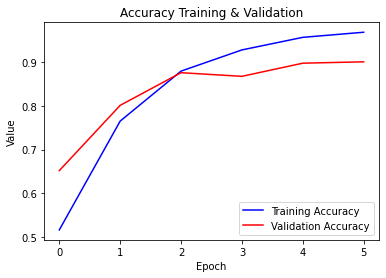

In [164]:
plt.plot(history_sentiment.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_sentiment.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Accuracy Training & Validation')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

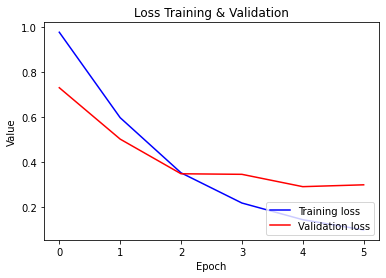

In [165]:
plt.plot(history_sentiment.history['loss'], label='Training loss', color='blue')
plt.plot(history_sentiment.history['val_loss'], label='Validation loss', color='red')
plt.title('Loss Training & Validation')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()